In [1]:
from numpy import nan
import matplotlib.pyplot as plt
from IPython.display import clear_output
from CNNOptimizer import CNNOptimizer

# Ploting functions

In [2]:
def iter_print(x, history):
    clear_output(wait=True)
    title = (f'Iteration {len(history["Objective"]):03}:   '
             f'J={history["Objective"][-1]:0.3f}     '
             f'V={history["Volume"][-1]:0.3f}     '
             f'G={history["Gray"][-1]:0.3f}')
    plt.imshow(x, origin='lower', cmap='Greys', vmin=0, vmax=1, interpolation='nearest')
    plt.title(title)
    plt.tick_params(axis='both', which='both', colors='w')
    plt.show()

In [3]:
def optimize(name, opt):
    print(f'Optimization started.')
    x, time = opt.optimize(iter_print)
    print(f'Optimization of {name} example finished in {time:0.2f} seconds.\n')

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(opt.history['Objective'] / max(opt.history['Objective']), label='Scaled Objective')
    ax.plot(opt.history['Volume'], '-.', label='Volume Fraction')
    ax.plot(opt.history['Gray'], ':', label='Gray Elements')
    ax.set_xlabel('Iteration number')
    ax.set_yscale("symlog", linthresh=0.01)
    plt.yticks([0, 0.02, 0.1, 0.5, 1], ['0.00', '0.02', '0.10', '0.50', '1.00'])
    plt.grid()
    plt.ylim(0, 1.5)
    plt.show()

# Defining the optimizer parameters

In [4]:
options = {
    'use_gpu': True,
    'mesh_size': (256, 256),  # (nx, ny) : Number of elements in x and y directions
    'volume_fraction': 0.30,  # Desired volume fraction
    'symmetry_axis': 'Y',  # Possible inputs: 'X', 'Y' and None
    'alpha_increase': 5,  # Amount of increase in alpha parameter in each iteration
    'penalty': 2, 'penalty_increase': 0.05,  # SIMP continuation scheme
    'learning_rate': 1.5E-4,
    'min_it': 25, 'max_it': 500, 'converge_criteria': 0.01  # Convergence options
}

# Defining boundary conditions of the problem
All the boundary conditions are defined as **dictionaries** in a **list** with parameters:
- **S**: Starting point of the selected region
- **E**: Ending point of the selected region
- **D**: Displacement of nodes in the selected region
- **F**: Force applied to nodes in the selected region


The force vector can be dependent on the coordinates **x** and **y**

In [5]:
bc = [{'S': (0, 0), 'E': (1, 0), 'D': (0, 0), 'F': 0},
      {'S': (0, 1), 'E': (1, 1), 'D': (nan, nan), 'F': lambda x, y: (0, -1)}]

# Defining the non-design regions
All the non-design regions are defined in a list as dictionaries with parameters:
- **S**: Starting point of the selected region
- **E**: Ending point of the selected region
- **Material**: Can be either **'Void'** or **'Solid'**

In [6]:
frozen = [{'S': (0, 0), 'E': (1, 0.02), 'Material': 'Solid'},
          {'S': (0, 0.98), 'E': (1, 1), 'Material': 'Solid'}]

# Running the optimizer to find the optimal design

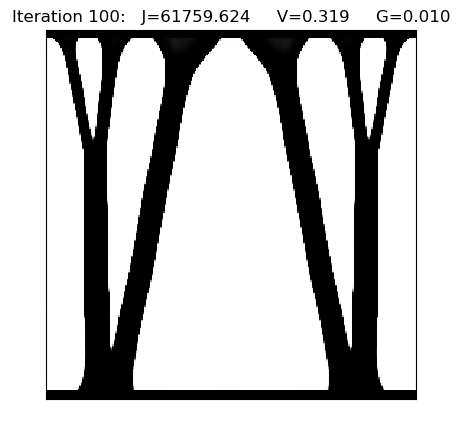

Optimization of Mid-loaded cantilever example finished in 56.86 seconds.



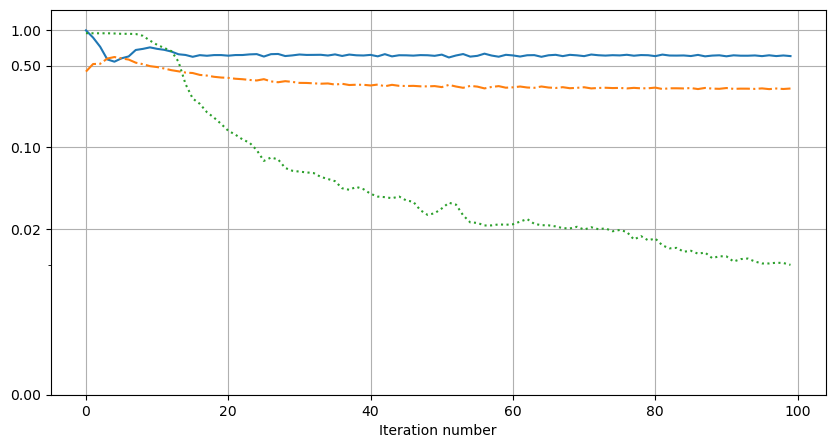

In [7]:
optimizer = CNNOptimizer(bc, frozen, options)
optimize('Mid-loaded cantilever', optimizer)